In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:

env = gym.make('CartPole-v1', render_mode="human")

print("Action Space: ", env.action_space)
print("Obs Space: ", env.observation_space)

Action Space:  Discrete(2)
Obs Space:  Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


In [10]:
def preprocess(obs):
    # print('raw: ', obs)
    
    obs[0] /= 4.8

    obs[1] /= 10
    obs[1] = max(-1, min(1, obs[1]))
    obs[1] = 0

    obs[2] /= 0.41887903 

    obs[3] /= 10
    obs[3] = max(-1, min(1, obs[3]))
    obs[3] = 0

    # print('pre: ', obs)
    return obs

In [11]:
W1 = np.zeros((4,2))
b1 = np.zeros(4)

W1[2,0] = 1
W1[2,1] = -1
print(W1)

W2 = np.zeros((2,1))
b2 = np.zeros(2)

W2[0,0] = 1
W2[1,0] = -1
print(W2)

[[ 0.  0.]
 [ 0.  0.]
 [ 1. -1.]
 [ 0.  0.]]
[[ 1.]
 [-1.]]


In [12]:
obs, info = env.reset()
history = [[] for _ in range(4)]
reward = []
length = []
episode_step = 0

In [13]:
for _ in range(1):

    env.render()    

    obs = preprocess(obs)
    print(obs)

    y1 = np.maximum(obs @ W1, 0)
    # print('obs: ', obs)
    # print('W1: ', W1)
    # print('y1: ', y1)
    y2 = y1 @ W2
    # print('y2: ', y2)

    if y2 > 0:
        action = 1
    elif y2 <= 0:
        action = 0

    #world time step
    # action = env.action_space.sample()  # agent policy that uses the observation and info
    # action = 0
    obs, reward, terminated, truncated, info = env.step(action)
    episode_step += 1

    for i in range(4):
        history[i].append(obs[i])
    
    if terminated or truncated:
        print(f'Ending Episode after {episode_step} steps')
        length.append(episode_step)

        episode_step = 0

        obs, info = env.reset()
        # break
        # break
    
    # print(f'x {obs[0]:0.2f}, x\u0307 {obs[1]:0.2f}, θ {obs[2]:0.2f}, θ\u0307 {obs[3]:0.2f}, r {reward}', end='\r')
    # clear_output()

print("Avg. Length: ", np.average(np.array(length)))

[-0.00051879  0.          0.06656078  0.        ]
Avg. Length:  nan


/home/bam-gpu/intelligent_machines/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/bam-gpu/intelligent_machines/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


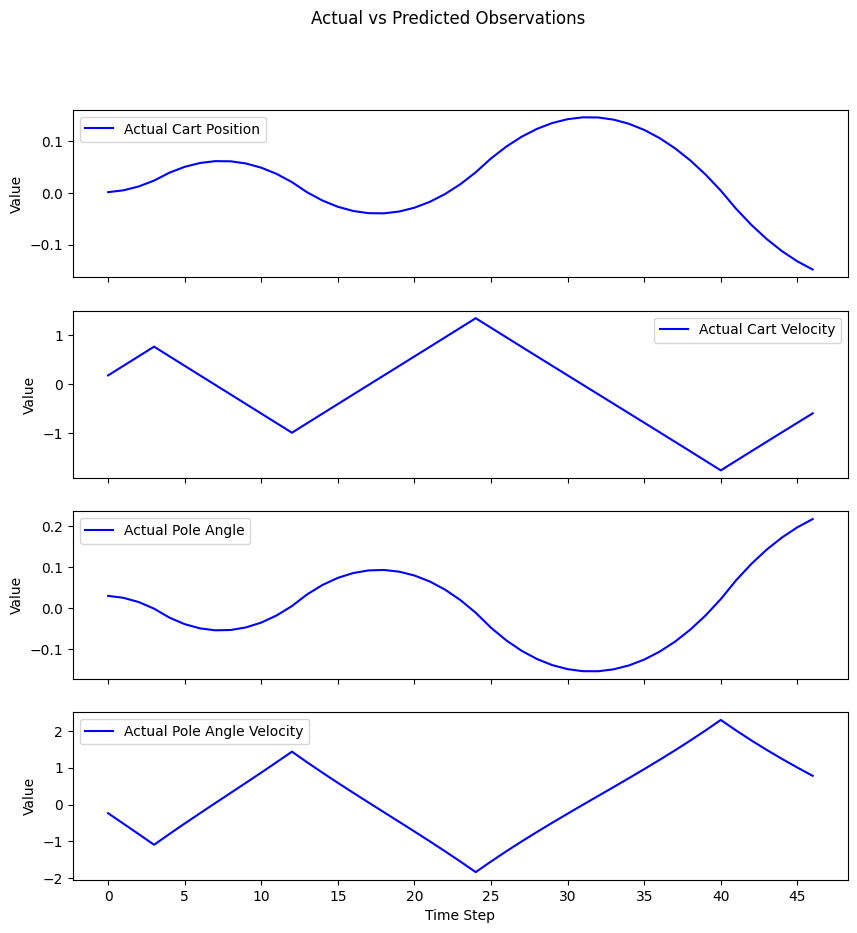

In [72]:
# Create subplots for each set of predicted and actual values
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

legend_labels = {
    1: 'Cart Position',
    2: 'Cart Velocity',
    3: 'Pole Angle',
    4: 'Pole Angle Velocity'
}

# Plot actual and predicted values for each set
for i in range(4):
    axs[i].plot(history[i], color='blue', linestyle='-', label=f'Actual {legend_labels[i+1]}')
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].set_xticks(range(0, len(history[i]), 5))

# Add labels and title
axs[-1].set_xlabel('Time Step')
plt.suptitle('Actual vs Predicted Observations')

# Show the plot
plt.show()

In [ ]:
env.close()